### BW Images
three seed, norm on vs off

In [1]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

from modules.expbuilder import default_params, run_exp

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_path_clean = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

##### Run two demo runs

In [2]:
default_params

{'_expdesign_name': 'notnamed',
 '_condition_name': 'notnamed',
 '_train_name': 'rf-v1-crops',
 '_test_name': 'test-regulation-2-all',
 '_train_path': Path('../../../rf-chess-data/cropped_v1'),
 '_test_path': Path('../../../other-chess-data/regulation-test-2-all'),
 '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
 '_fit_one_cycle_epochs': 10,
 '_fine_tune_epochs': 15,
 '_train_seed': 0,
 '_valid_pct': 0.2,
 '_rm_norm': False,
 '_learn_norm': False,
 '_weighted_dl': False,
 '_weight_func': <function modules.expbuilder.weight_func(item_path)>,
 '_bw_images': False,
 '_mult': 1.0,
 '_max_lighting': 0.9,
 '_max_warp': 0.4,
 '_max_rotate': 20.0,
 '_resize_method': 'pad',
 '_pad_mode': 'reflection',
 '_bs': 32,
 '_p_lighting': 0.75,
 '_aug_re': False,
 '_re_params': {'p': 0.5,
  'sl': 0.0,
  'sh': 0.3,
  'min_aspect': 0.3,
  'max_count': 1},
 '_custom_crop': None,
 '_custom_train_fnames': None,
 '_custom_train_fnames_args': {}}

In [2]:
seeds = [0,1,2]

grid_params = [
    {'_expdesign_name': 'bw_images',
     '_condition_name': 'bw' if _bw_images else 'color',
     '_test_name':      'test-regulation-2-easy',
     '_test_path':       test_path_easy,
     '_train_path':      train_path_clean,
     '_model_arch':      resnet50,
     '_custom_crop':     'my-top-crop',
     '_learn_norm':      _learn_norm,
     '_bw_images':       _bw_images,
     '_train_seed':      seed,
    }  
    for _learn_norm, _bw_images in [[True, True], [False, False]]
    for seed in seeds]

In [3]:
grid_params[:1]

[{'_expdesign_name': 'bw_images',
  '_condition_name': 'bw',
  '_test_name': 'test-regulation-2-easy',
  '_test_path': Path('../../../other-chess-data/regulation-test-2-easy'),
  '_train_path': Path('../../../rf-chess-data/cropped_v1.1'),
  '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
  '_custom_crop': 'my-top-crop',
  '_learn_norm': True,
  '_bw_images': True,
  '_train_seed': 0}]

In [4]:
for param in grid_params:
    
    run_params = default_params.copy()
    run_params.update(param)
    
    run_exp(run_params, 
            name_base='basicexp',
            b_msg=True, 
            b_cuda=True)

starting training...


saving to name_base: basicexp-89
Finished with:

{'valid_loss': 0.0007827074150554836, 'accuracy': 1.0}
{'test_loss': 0.24337704479694366, 'test_accuracy': 0.9135802388191223}


finished in 347.9 secs

starting training...


saving to name_base: basicexp-90
Finished with:

{'valid_loss': 0.0016897671157494187, 'accuracy': 1.0}
{'test_loss': 0.2641383707523346, 'test_accuracy': 0.9135802388191223}


finished in 347.16 secs

starting training...


saving to name_base: basicexp-91
Finished with:

{'valid_loss': 0.0001932120940182358, 'accuracy': 1.0}
{'test_loss': 0.3732236921787262, 'test_accuracy': 0.8703703880310059}


finished in 346.36 secs

starting training...


saving to name_base: basicexp-92
Finished with:

{'valid_loss': 0.00023174451780505478, 'accuracy': 1.0}
{'test_loss': 0.27883121371269226, 'test_accuracy': 0.895061731338501}


finished in 346.4 secs

starting training...


saving to name_base: basicexp-93
Finished with:

{'valid_loss': 0.00011423655814724043, 'accuracy': 1.0}
{'test_loss': 0.23341859877109528, 'test_accuracy': 0.9259259104728699}


finished in 347.3 secs

starting training...


saving to name_base: basicexp-94
Finished with:

{'valid_loss': 0.0003428118652664125, 'accuracy': 1.0}
{'test_loss': 0.30811643600463867, 'test_accuracy': 0.8580247163772583}


finished in 355.16 secs



In [5]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [6]:
nums = get_dir_nums(log_dir='../models/model-logs/')

In [7]:
nums.pop(81); nums.pop(82)

83

In [9]:
ret = get_tbls('basicexp', nums, log_dir='../models/model-logs')

d_metrics, d_resid, d_params = ret

In [10]:
cmp_param = '_condition_name'

In [11]:
exps_all = d_params[d_params['_expdesign_name'] == 'bw_images'].index

In [12]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_train_seed        3
model_fn           6
_condition_name    2
_learn_norm        2
_bw_images         2
dtype: int64

In [13]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [14]:
exp_metrics['exp_name'].unique()

array(['basicexp-89', 'basicexp-90', 'basicexp-91', 'basicexp-92',
       'basicexp-93', 'basicexp-94'], dtype=object)

In [15]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [16]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

In [17]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

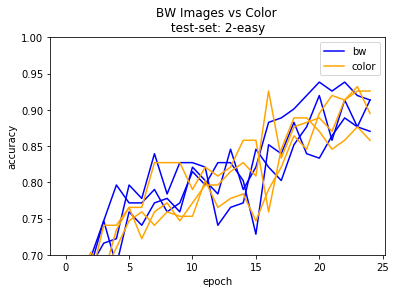

In [19]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('BW Images vs Color \n test-set: 2-easy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.7, 1.0]);

In [20]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param
                            ,values='test_loss')

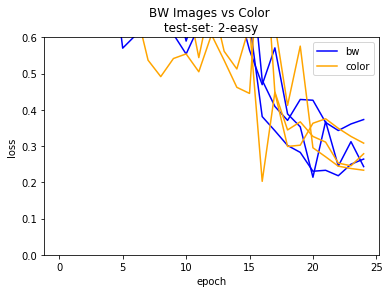

In [21]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('BW Images vs Color \n test-set: 2-easy ')
plt.ylabel('loss')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([0.0, 0.6]);